<a href="https://colab.research.google.com/github/stuthiudupa/Capstone/blob/main/DCGAN_Hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SNGAN implementation

Click on Run all

Dataset automatically gets downloaded upon running this program from the kaggle dataset link.

Link to dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

(If you get an error while running DCGAN, open the dcgan.py (/content/MedImageGAN/models/dcgan.py) file and on line 49 change nd to ndf)

In [1]:
!git clone https://github.com/AlexisMolinaMR/MedImageGAN.git

Cloning into 'MedImageGAN'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 178 (delta 89), reused 81 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (178/178), 57.09 KiB | 330.00 KiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
!kaggle datasets download -d kmader/rsna-bone-age

Dataset URL: https://www.kaggle.com/datasets/kmader/rsna-bone-age
License(s): other
100% 9.29G/9.29G [09:03<00:00, 18.6MB/s]
100% 9.29G/9.29G [09:03<00:00, 18.3MB/s]


In [3]:
import zipfile
import os

# Define the path to the downloaded ZIP file and the directory where you want to extract it
zip_file_path = "rsna-bone-age.zip"
extracted_dir_path = "rsna-bone-age"

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print(f"Files extracted to: {extracted_dir_path}")


Files extracted to: rsna-bone-age


In [5]:
!pip install torch torchvision PyYAML numpy piqa

In [6]:
!mkdir output

In [7]:
content = """
arch: 'DCGAN'

path: '/content/rsna-bone-age/boneage-test-dataset'
out: '/content/output/images'
run: 'name'
seed: 42
n_gpu: 1

num_epochs: 500
learning_rate: 0.0002
beta_adam: 0.5
batch_size: 16

latent_vector: 256

image_size: 64
loader_workers: 2
number_channels: 3
gen_feature_maps: 64
dis_feature_maps: 64
"""

# Specify the filename
filename = '/content/MedImageGAN/input.yaml'

# Write the content to the file
with open(filename, 'w') as file:
    file.write(content)

print(f"File '{filename}' created and content added.")

import time

start = time.time()


File '/content/MedImageGAN/input.yaml' created and content added.


In [8]:
!python3 /content/MedImageGAN/image_generator.py /content/MedImageGAN/input.yaml

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(256, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [9]:
end = time.time()

print("Time taken: ", end - start)


Time taken:  2955.458612203598


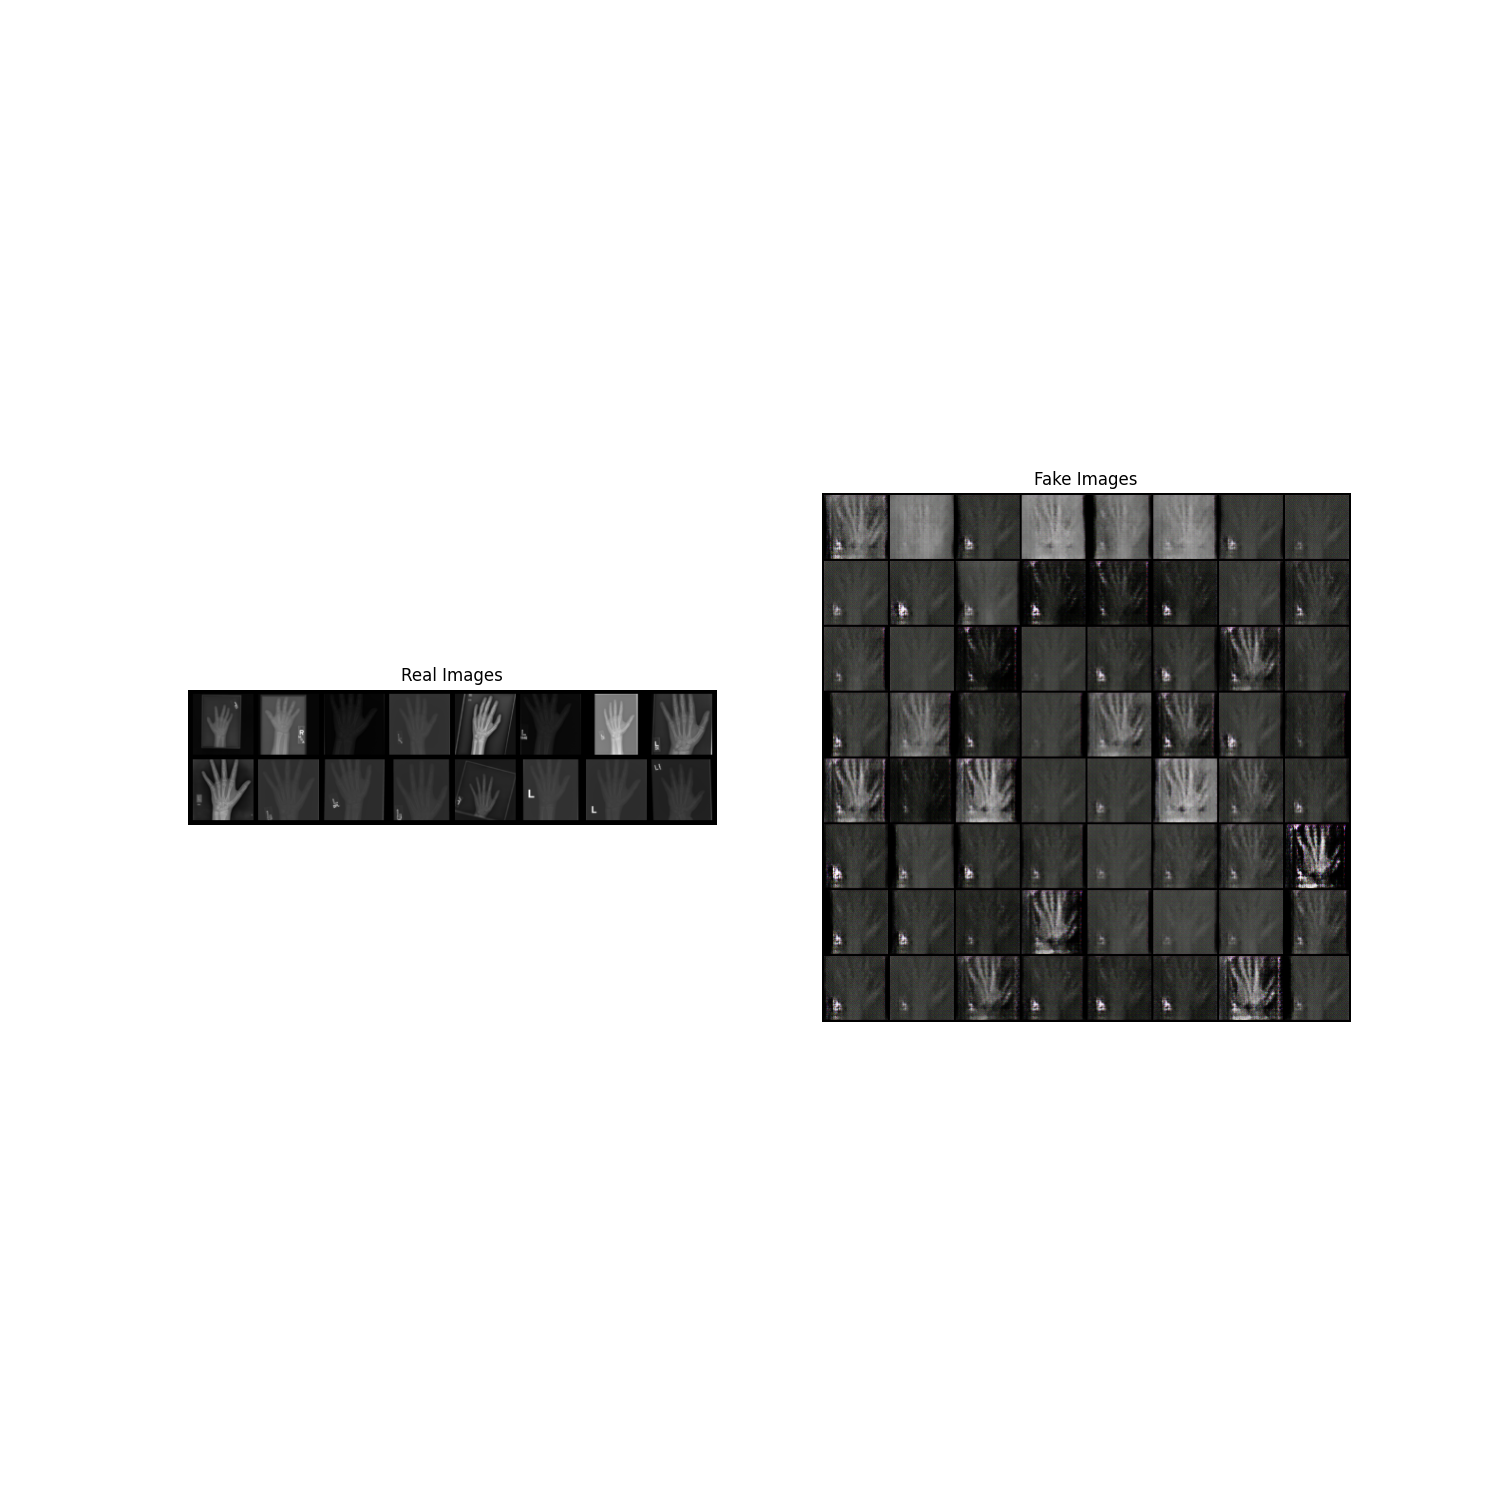

In [10]:
from IPython.display import Image, display

# Display the image
display(Image('/content/output/imagesname_real_fake_grid.png'))


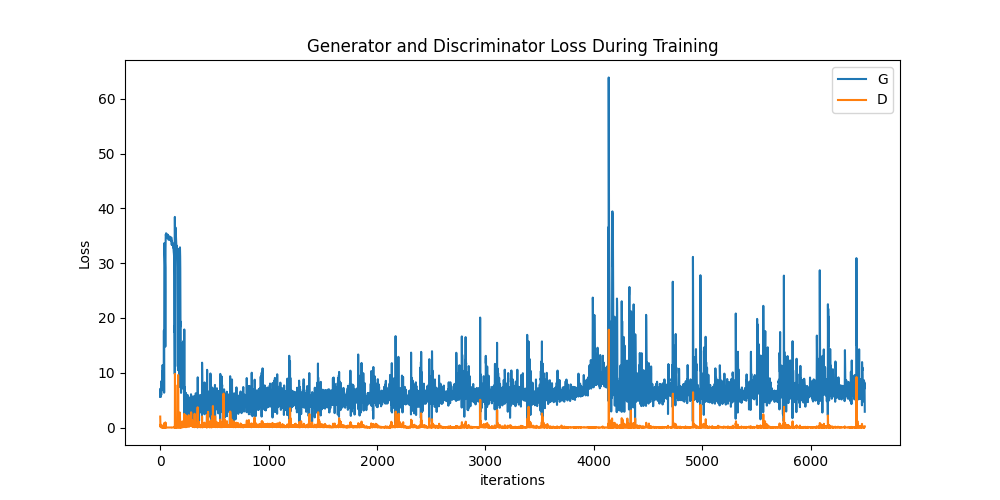

In [11]:
from IPython.display import Image, display

# Display the image
display(Image('/content/output/imagesname_loss_plot.png'))
